In [124]:
#Loading the data in jupyter notebook
import numpy as np
import pandas as pd
import datetime
data=pd.read_csv("Open Airbnb Data.csv")

In [125]:
#Changing the dataheads to snake_case
data.columns=data.columns.str.replace(" ","_")
print(data.columns)

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'country', 'country_code', 'instant_bookable', 'cancellation_policy',
       'room_type', 'Construction_year', 'price', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'house_rules',
       'license'],
      dtype='object')


In [126]:

#Getting general informatin about the dataset
data.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


From the sample dataset shown above(the first five rows),it is clear that there are some missing values.

In [127]:
#getting general summary statistics of the dataset
data.describe()

,id,host_id,latitude,longitude,Construction_year,minimum_nights,number_of_reviews,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,license
count,5.093000e+03,5.093000e+03,5085.000000,5085.000000,4958.000000,5009.000000,5085.00000,4629.000000,5000.000000,5070.000000,4945.000000,0.0
mean,2.407492e+06,4.873079e+10,40.728916,-73.960927,2012.367689,10.756838,56.79646,0.898289,3.002400,2.501578,208.590698,NaN
std,8.120836e+05,2.849726e+10,0.051496,0.035624,5.782151,59.067771,76.66971,1.087883,1.419154,6.263080,125.781793,NaN
min,1.001254e+06,1.316021e+08,40.508680,-74.239860,2003.000000,-12.000000,0.00000,0.010000,1.000000,1.000000,-10.000000,NaN
25%,1.704414e+06,2.395762e+10,40.688640,-73.984550,2007.000000,2.000000,5.00000,0.150000,2.000000,1.000000,99.000000,NaN
50%,2.407492e+06,4.810433e+10,40.722900,-73.960630,2012.000000,3.000000,23.00000,0.460000,3.000000,1.000000,209.000000,NaN
75%,3.110570e+06,7.351923e+10,40.762920,-73.944990,2017.000000,6.000000,78.00000,1.260000,4.000000,2.000000,318.000000,NaN
max,3.813648e+06,9.872629e+10,40.908040,-73.733230,2022.000000,3455.000000,607.00000,10.000000,5.000000,52.000000,426.000000,NaN


In [128]:
#Checking for number of columns
no_of_rows=data.shape[0]
no_of_columns=data.shape[1]
print(no_of_rows)
print(no_of_columns)

5093
26


this dataset has 5093 rows and 26 columns

In [129]:
#Checking the data types of our columns
#Knowing the datatype helps with detecting 
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_identity_verified             object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
country                            object
country_code                       object
instant_bookable                   object
cancellation_policy                object
room_type                          object
Construction_year                 float64
price                              object
service_fee                        object
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
review_rate_number                float64
calculated_host_listings_count    float64
availability_365                  

This data types has three data types;integers(whole numbers),float(numeric values with decimal numbers) and object data types.

In [130]:
#DATA CLEANING 
#HANDLING MISSING VALUES
#general view of how many missing values there is per column 
missing_values_count=data.isnull().sum()
missing_values_count[0:26]


id                                   0
name                                58
host_id                              0
host_identity_verified              73
host_name                           20
neighbourhood_group                 27
neighbourhood                       16
latitude                             8
longitude                            8
country                             50
country_code                        79
instant_bookable                    79
cancellation_policy                 50
room_type                            0
Construction_year                  135
price                               11
service_fee                         15
minimum_nights                      84
number_of_reviews                    8
last_review                        478
reviews_per_month                  464
review_rate_number                  93
calculated_host_listings_count      23
availability_365                   148
house_rules                       1615
license                  

almost all the columns have missing values apart from the id,room type and host Id columns.

In [131]:
#DROPPING ROWS WITH MISSING VALUES USING THE dropna() function
data.dropna(subset=["latitude","longitude","number_of_reviews","name","host_identity_verified","host_name","name",
                    "Construction_year"],inplace=True)

Dropping the columns with missing values made sense because the values were missing probably because they were not recorded and not because they do not exist and it makes sense to drop them rather than guessing what they might have been based on the other values in that column and row. You cannot guess the hosts' names and the names of the airbnb hence dropping the rows with this missing information.

In [133]:
#DROPPING ROWS WITH MISSING NUMERIC VALUES
data.dropna(subset=["price","service_fee",],inplace=True)
data.dropna(subset=["last_review","reviews_per_month"],inplace=True)

it is hard to predict or guess the dates(in the last review column) date hence dropping the rows with the missing values.

In [139]:

data.dropna(subset=["minimum_nights"],inplace=True)
data.dropna(subset=["availability_365"],inplace=True)
data.dropna(subset=["Construction_year"],inplace=True)

In [141]:
#DATA IMPUTATION USING THE fillna() function
#filling in rows with missing values in some columns
data["country"].fillna("United States",inplace=True)
data["country_code"].fillna("US",inplace=True)

Since this is New York's city data,the country must be the United States and the country code must be US hence replacing the missing values with United states and US respectively .
The assumption being that the missing values were just not recorded.

In [145]:
data["neighbourhood_group"].fillna("Manhattan",inplace=True)
data["neighbourhood"].fillna("Upper West Side",inplace=True)
data["instant_bookable"].fillna("TRUE",inplace=True)
data["cancellation_policy"].fillna("moderate",inplace=True)

In [147]:
#DATA IMPUTATION USING THE MEAN FUNCTION
data["review_rate_number"].fillna(data["review_rate_number"].mean(),inplace=True)
data["calculated_host_listings_count"].fillna(data["calculated_host_listings_count"].mean(),inplace=True)

In [149]:
#Filling in the missing values in the house rules and license column
data["house_rules"].fillna("none",inplace=True)
data["license"].fillna("none",inplace=True)

The house rules and licence columns have a lot of missing values.
In this case, though, the data is missing because,probably the airbnb owners had no written house rules for their airbnbs
And if there was no house rules then it doesn't make sense to guess what the rules and licence were.
 For this columns, it would make more sense to add a third value like "none" and use that to replace the NA's.
 none represents no rules or licence.

In [150]:
#checking if the rows with missing values have been filled and dropped
missing_values_count=data.isnull().sum()
missing_values_count[0:26]

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
Construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
house_rules                       0
license                           0
dtype: int64

all the missing values have been filled and dropped and this dataset has no missing values.

In [151]:
#checking the total remaining rows after handling missing values
print(data)

           id                                              name      host_id  \
0     1001254                Clean & quiet apt home by the park  80014485718   
1     1002102                             Skylit Midtown Castle  52335172823   
4     1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5     1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
7     1005202                                   BlissArtsSpace!  90821839709   
...       ...                                               ...          ...   
5088  3811438            Great Room for International Students!  78573634300   
5089  3811991                                    Sunny/Cozy 1BD  12514109792   
5090  3812543               Home Away from Home-Room in Midtown   7545062881   
5091  3813095                Amazing LOFT in Prime Williamsburg  34705707902   
5092  3813648                      Private Room in Williamsburg  16798739375   

     host_identity_verified host_name n

The remaining rows are 4243 after handling missing values.

In [152]:
#checking the datatype of the column that has dates
print(data["last_review"].head())

0    10/19/2021
1     5/21/2022
4    11/19/2018
5     6/22/2019
7    10/05/2017
Name: last_review, dtype: object


The date column has a string datatype

In [153]:
#changing the date values from objects to datetime data type
data["date_parsed"] = pd.to_datetime(data["last_review"], format = "%m/%d/%Y")
data["date_parsed"].head()

0   2021-10-19
1   2022-05-21
4   2018-11-19
5   2019-06-22
7   2017-10-05
Name: date_parsed, dtype: datetime64[ns]

In [156]:
#HANDLING DATA INCONSISTENCIES
#Rounding data values to 2 decimal places using the round() function
data["review_rate_number"] = data["review_rate_number"].round(2)
data["reviews_per_month"] = data["reviews_per_month"].round(2)
data["calculated_host_listings_count"] = data["calculated_host_listings_count"].round(2)

The columns above contain data values with more than 2 decimal places.
the data values have been rounded off to two decimal places but the whole value remain unchanged.

In [157]:
#correcting columns with wrong values/incorrect data
#identifying the rows that have incorrect data using boolean indexing
incorrect_rows= data[data["house_rules"] == "#NAME?"]
#correcting the rows
data.loc[data["house_rules"] == "#NAME?","house_rules"] = "none"

In [163]:
#CHECKING THE DATA DISTRIBUTION
#CHECKING THE FREQUENCY OF THE UNIQUE VALUES IN THE CATEGORICAL COLUMNS using the value.count()column
#column1
host_counts= data["host_identity_verified"].value_counts()
#column2
neighbors_counts= data["neighbourhood_group"].value_counts()
data.loc[data["neighbourhood_group"] == "brookln","neighbourhood_group"] = "Brooklyn"

#column3
booking_counts= data["instant_bookable"].value_counts()

#column4
policy_counts= data["cancellation_policy"].value_counts()

#column5
room_counts= data["room_type"].value_counts()


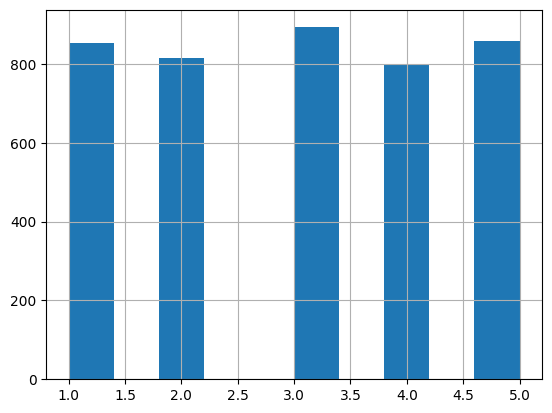

In [165]:
#visualizing the distribution of data
import matplotlib.pyplot as plt
data["review_rate_number"].hist()
plt.show()


There are no outliers in the review_rate_number

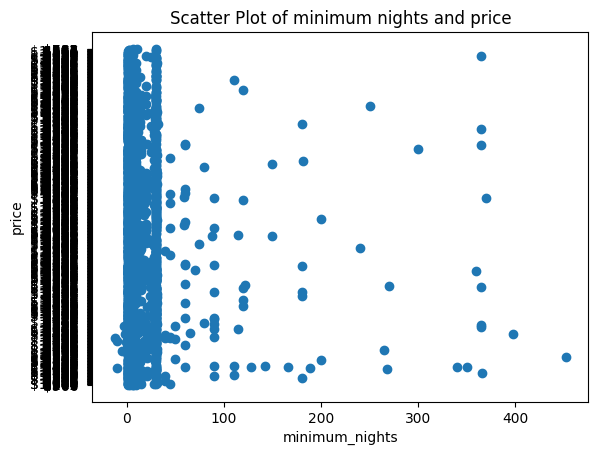

In [173]:
plt.scatter(data["minimum_nights"],data["price"])
plt.xlabel("minimum_nights")
plt.ylabel("price")
plt.title("Scatter Plot of minimum nights and price")
plt.show()

There are outliers present in the minimum night column.
Outliers are data points that are far away from the main cluster of points in the scatter plot. 
In this case,the main cluster of points are aroun 0 and 100.

In [174]:
#HANDLING OUTLIERS IN THE MINIMUM NIGHTS COLUMN
#REMOVE THE ROWS THAT HAVE NEGATIVE DATA VALUES IN THIS COLUMN using boolean indexing
data = data[data["minimum_nights"] >= 0]


In [176]:
excel_file_path=r"C:\\Users\\USER\\Downloads\\Airbnb_data.xlsx"
data.to_excel(excel_file_path, index=False)